# 로지스틱 회귀

### 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측합니다.

## 럭키백의 확률

생선의 크기, 무게 등이 주어졌을때 7개 생선에 대한 확률을 출력해야 한다.

>k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?

k-최근접 이웃 분류기로 생선의 확률을 구해보자

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# head() 메서드로 처음 5개 행을 출력해 보자.
fish.head()
# 판다스는 csv 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어 준다.

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


어떤 종류의 생선이 있는지 Specis 열에서 고유한 값을 출력해 보자.

In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용하자.

데이터프레임에서 원하는 열을 리스트로 나열하면 된다.

In [5]:
fish_input = fish[['Weight', 'Length','Diagonal', 'Height','Width']].to_numpy()

데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환된다.
fish_input에 5개의 특성이 잘 저장되었는지 처음 5개 행을 출력해보자

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


이제 동일한 방식으로 타깃 데이터를 만들어보자

In [8]:
fish_target = fish['Species'].to_numpy()

이제 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

그다음 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세르를 표준화 전처리 하자.
훈련 세트의 통계값으로 테스트 세트를 변환해야 한다는 것은 잊지말자.

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터는 모두 준비되었다. 이제 k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률을 예측해보자.

2장에서 했던 것처럼 사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인해 보자.

최근접 이웃 개수인 k를 3으로 지정하여 사용한다.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


여기서는 클래스 확률을 배우는 것이 목적이르모 훈련세트와 테스트 세트 점수에 대해서는 잠시 잊도록하자.

fish 데이터프레임에서 7개의 생선이 있었다. 훈련세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가있다.

이렇게 타깃데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류**라고 부른다.

이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃데이터를 만들었다.

다중분류에서는 편리하게 문자열로 된 타깃값을 그대로 사용할 수 있다.

주의할점은 순서가 자동으로 알파벳 순으로 매겨진다.

KNeighborsClassifier에서 정련된 타깃값은 classes_속성에 저장되어 있다.

In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


predict() 메서드는 타깃값으로 예측을 출력한다.

테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해보자.

In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


이 5개 샘플에 대한 예측은 어떤 확률로 만들어 졌을까?

사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다.

테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해보자.

In [17]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
# decimals=4 -> 소수점 네 번째 자리까지 표기한다. 다섯번째 자리에서 반올림한다.
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


출력 순서는 classes_속성과 같다. 첫번째 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률이다.
![사진](./proba.jpeg)

이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 보자. 네번째 샘플의 최근접 이웃의 클래스를 확인해보자.

In [18]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯번째 클래스인 'Roach'가 1개이고 세번째 클래스인 'Perch'가 2개이다.

다섯번째 클래스에 대한 확률은 0.3333이고 세번째 클래스에 대한 확률은 0.6667이 된다. 

앞서 출력한 네번째 샘플의 클래스 확률과 같다.

하지만 생각해보니 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부겠다.

뭔가 더 좋은 방법을 찾아야 할 것 같다.

## 로지스틱 회귀

**로지스틱 회귀**는 이름은 회귀이지만 분류 모델이다.

선형 회귀와 동일하게 선형 방정식을 학습한다.

>$z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f$

a,b,c,d,e는 가중치 혹은 계수이다. z는 어떤 값도 가능하다.

하지만 확률이 되려면 z가 아주 큰 음수일때 0이되고, z가 아주 큰 양수일때 1이 되도록 바꿔야 한다.

**시그모이드 함수** 또는 **로지스틱 함수**를 사용하면 가능하다.

![사진](./sigmoid.jpeg)

>선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다. 그러면 오른쪽과 같은 그래프를 만들 수 있다.

넘파이를 사용하면 그래프를 간단히 그릴 수 있다.

-5와 5 사이에 0.1 간격으로 배열 z를 만든 다음 z위치마다 시그모이드 함수를 계산한다. 지수함수 계산은 np.exp()함수를 사용한다.


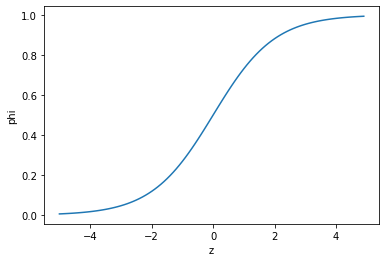

In [20]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력은 정말로 0에서 1까지 변한다.

이제 로지스틱 회귀 모델을 훈련해 보자.

로지스틱 회귀 모델인 LogisticRegression 클래스가 있다.

**이진 분류**일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단한다.
>딱 0.5일경우는 사이킷런은 음성 클래스로 판단한다.

먼저 도미와 빙어 2개를 사용해 이진 분류를 수행해 보자.

## 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **불리언 인덱싱**이라 한다.

'A'에서 'E'까지 5개의 원소가 있을때 'A'와 'C'만 골라내려면 첫번째와 세번째 원소만 True이면 된다.

In [21]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


이와 같은 방식으로 훈련 세트에서 도미와 빙어의 행만 골라내보자.

In [22]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외는 모두 False값이 들어가 있다.

이제 이 데이터로 로지스틱 회귀 모델을 훈련해 보자.

LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지 아래 있다.

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
# 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개의 샘플을 예측해보자.
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두번째 샘플을 제외하고는 모두 도미로 예측했다.

train_bream_smelt에서 처음 5개 샘플의 예측 확률을 출력해보자.

In [25]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


첫번째 열이 음성클래스(0)에 대한 확률이고 두번째 열이 양성클래스(1)에 대한 확률이다.

그럼 Bream과 Smelt중에 어떤 것이 양성 클래스일까?

앞서 k-최근접 이웃 분류기에서 보았듯이 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용한다.

classes_속성에서 확인해보자.

In [26]:
print(lr.classes_)

['Bream' 'Smelt']


빙어(Smelt)가 양성클래스 이다. 

그럼 선형 회귀에서 처럼 로지스틱 회귀가 학습한 계수를 확인해 보자.

In [28]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.

>$z = -0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013 * (Height) - 0.732 * (Width) - 2.161$

그럼 LogisticRegression 모델로 z값을 계산 해 볼 수 있을까? 가능하다.

LogisticRegression 클래스는 decision_function() 메서드로 z값을 출력할 수 있다.

train_bream_smelt의 처음 5개 샘플의 z값을 출력해보자.

In [29]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.

파이썬의 사이파이 라이브러리에도 시그모이드 함수가 있다. 바로 **expit()**이다.

decisions 배열의 값을 확률로 변환해 보자.

In [30]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다.

즉 decision_function() 메서드는 양성 클래스에 대한 z값을 반환한다.

이진 분류를 위해 로지스틱 회귀 모델을 훈련했다.

이진 분류일 경우 음성 클래스와 양성클래스에 대한 확률을 출력한다.

또 decision_function() 메서드는 양성클래스에 대한 z값을 계산한다.

coef_속성과 intercept_속성에는 선형방정식의 계수가 들어있다.

이제 이진 분류의 경험을 바탕으로 7개의 생선을 분류하는 **다중 분류 문제**로 넘어가 보자

## 로지스틱 회귀로 다중 분류 수행하기

LogisticRegression 클래스를 사용해 이진 분류와의 차이점을 알아보자.

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.

LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. 이런 규제를 **L2 규제**라고 한다.

LogisticRegression에서 규제를 제어하는 변수는 **C**이다.

C는 alpha와 반대로 작을수록 규제가 커진다. C의 기본값은 1이다.

다음 코드는 LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드이다.

In [32]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우친 것 같지 않다.

그럼 테스트 세트의 처음 5개 샘플에 대한 예측을 출력해보자.

In [33]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


이번에는 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해보자.

In [34]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


첫 번째 샘플을 보면 세번째 열의 확률이 가장 높다. 세 번째 열이 농어(Perch)에 대한 확률일까? classes_속성에서 클래스 정보를 확인해보자.

In [35]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


이진 분류는 샘플마다 2개의 확률을 출력하고 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다.

이중에서 가장 높은 확률이 예측 클래스가 된다.

그럼 선형 방정식은 어떤 모습일까? coef_와 intercept_의 크기를 출력해보자.

In [36]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_배열의 열은 5개이다.

그런데 행이 7이다. intercept_도 7개나 된다. 이말은 이진 분류에서 보았던 z를 7개나 계산 한다는 의미이다.

다중분류는 z값을 하나씩 계산하고 가장높은 z값을 출력하는 클래스가 예측 클래스가 된다.

다중분류는 **소프트맥스**함수를 사용하여 7개의 z값을 확률로 변환한다.

>소프트맥스 함수는 여러개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다.
이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부른다.

먼저 7개의 z 값의 이름을 z1~z7이라고 붙인다.

z1~z7까지 값을 사용해 지수함수 $e^{z1}$ ~ $e^{z7}$을 계산해 모두 더한다. 이를 e_sum이라고 한다.

>s_sum = $e^{z1}$ + $e^{z2}$ + $e^{z3}$ + $e^{z4}$ + $e^{z5}$ + $e^{z6}$ + $e^{z7}$

그 다음 $e^{z1}$~$e^{z7}$ 을 각각 e_sum으로 나누어 주면 된다.
>s1 = $e^{z1} \over e\_{sum}$, s2 = $e^{z2} \over e\_{sum}$, ..., s7 = $e^{z7} \over e\_{sum}$,

s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이된다. 7개 생선에 대한 확률의 합은 1이 되어야 하므로 잘 맞는다.

그럼 이진 분류에서처럼 decision_function()메서드로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 바꾸어 보자.

먼저 5개 샘플에 대한 z1 ~ z7의 값을 구해보자.

In [39]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


사이파이는 소프트맥스 함수도 제공한다. scipy.spicial 아래에 softmax() 함수를 임포트해 사용해보자.

In [40]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정한다.

여기서는 각 샘플에 대해 소프트맥스를 계산한다.

매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.

출력결과를 앞서 구한 proba배열과 비교해보니 결과가 정확히 일치한다.

이번에는 로지스틱 회귀를 사용해 7개의 생선에 대한 확률을 예측하는 모델을 훈련하였다.

## 로지스틱 회귀로 확률 예측 <문제해결 과정>

이번에는 어떤 생선인지 확률을 예측해보았다.

**분류 모델**은 예측 뿐만 아니라 예측의 근거가 되는 확률을 출력할 수 있다.

이 확률은 분류 모델이 얼마나 예측을 확신하는지 나타낸다.

k-최근접 이웃 모델은 항상 정해진 확률만 출력한다.

이를 위해 대료적인 분류 알고리즘 중 하나인 **로지스틱 회귀**를 사용하였다.

로지스틱 회귀는 분류 모델이다. 선형 회귀처럼 선형 방정식을 사용한다.

하지만 계산한 값을 그대로 출력하는 것이 아니라 이 값을 0~1 사이로 압축한다.

로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련한다.

이 방정식의 출력값을 **시그모이드** 함수에 통과시켜 0~1 사이의 값을 만든다 이 값이 양성 클래스에 대한 확률이다.

**다중 분류**일 경우 클래스 개수만큼 방정식을 훈련한다.

각 방정식의 출력값을 **소프트맥스**함수를 통과시켜 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해 할 수 있다.

다음 절에는 **확률적 경사 하강법**에 대해 배워보자.